In [1]:
from sklearn.datasets import fetch_openml

In [2]:

mnist = fetch_openml('mnist_784',version=1,as_frame =False)

c:\Users\HP\.conda\envs\avb_dev1\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X ,y = mnist['data'],mnist['target']

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X.shape

(70000, 784)

In [7]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
y.shape

(70000,)

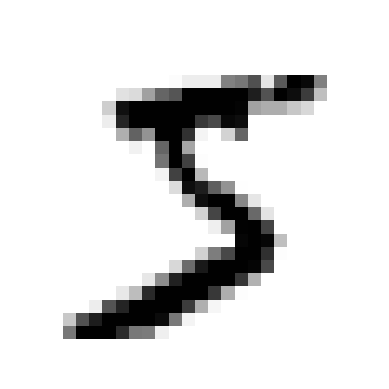

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [10]:
y[0]

'5'

In [11]:
import numpy as np

In [12]:
y = y.astype(np.uint8)

In [13]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [14]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

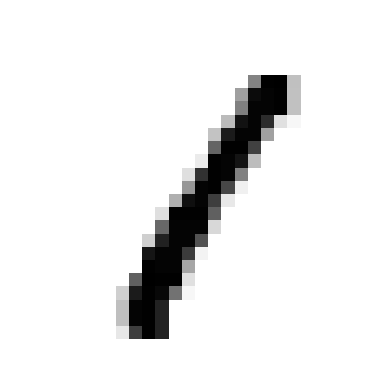

In [15]:
plot_digit(X[3])

In [16]:
y[3]

1

In [17]:
IMAGES_PATH = ''

In [18]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [19]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [20]:
import os

Saving figure more_digits_plot


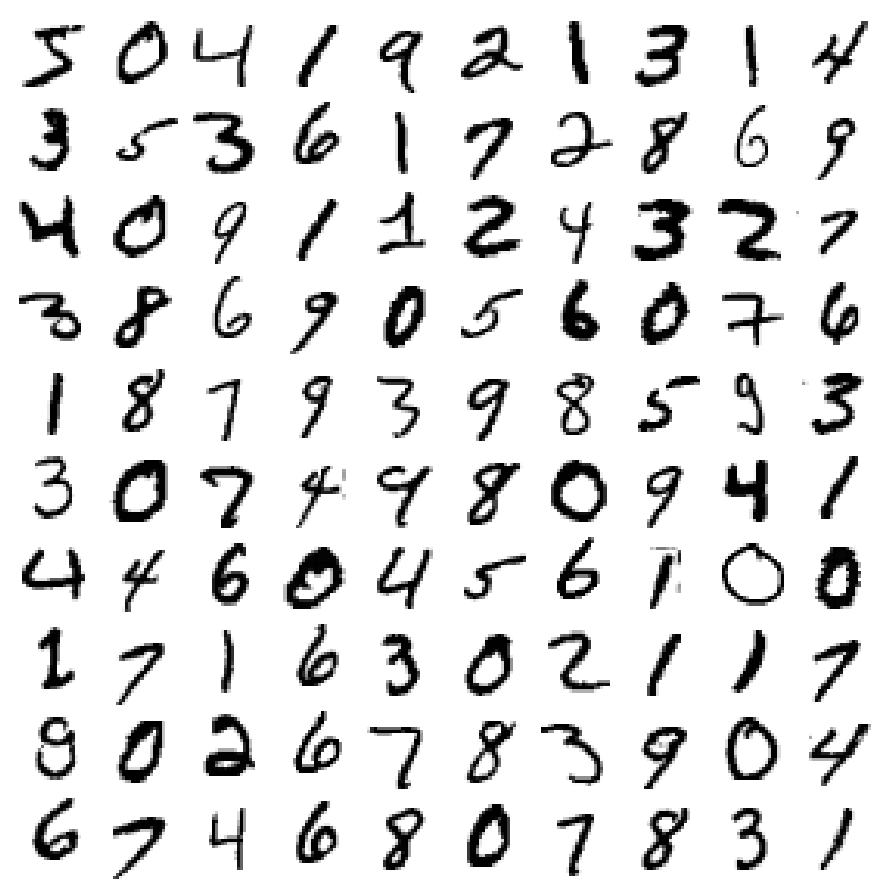

In [21]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [22]:
X_train , X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [23]:
y_train_5  = (y_train == 5)
y_test_5 = (y_test == 5)

Stochastic Gradient Descent

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

In [27]:
sgd_clf.predict([X[3]])

array([False])

Measuring accuracy with the help of Cross-Validation

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [29]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Now it is giving good accuracy but let us also see the other side of the story

In [32]:
from sklearn.base import BaseEstimator

In [33]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [34]:
never_5_classifier = Never5Classifier()
cross_val_score(never_5_classifier, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

We got over a 90% accuracy just because 10% of the data roughly are 5s.
So accuracy alone is not a great predictor in classification type problem, so we go for other matrix such as Confusion Matrix

Confusion Matrix

In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

ideal case

In [39]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5 , y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Precision and Recall

In [40]:
from sklearn.metrics import precision_score, recall_score

In [41]:
precision_score(y_train_5,y_train_pred)


0.8370879772350012

In [42]:
recall_score(y_train_5,y_train_pred)


0.6511713705958311

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

Thresholds for Precision vs Recall curve

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

precision and recall for all possible thresholds

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


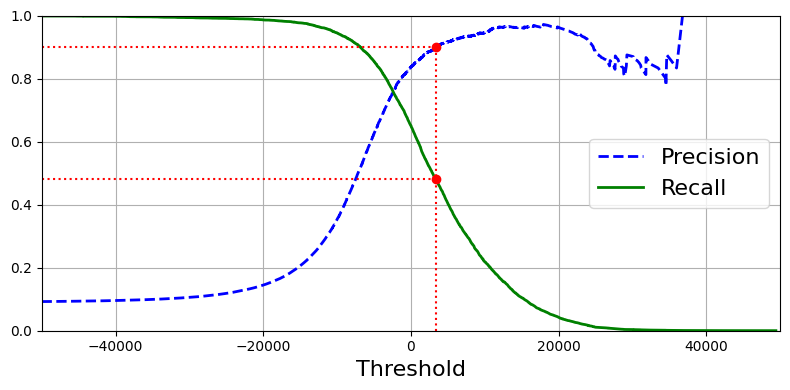

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [49]:
(y_train_pred == (y_scores > 0)).all()


True

Saving figure precision_vs_recall_plot


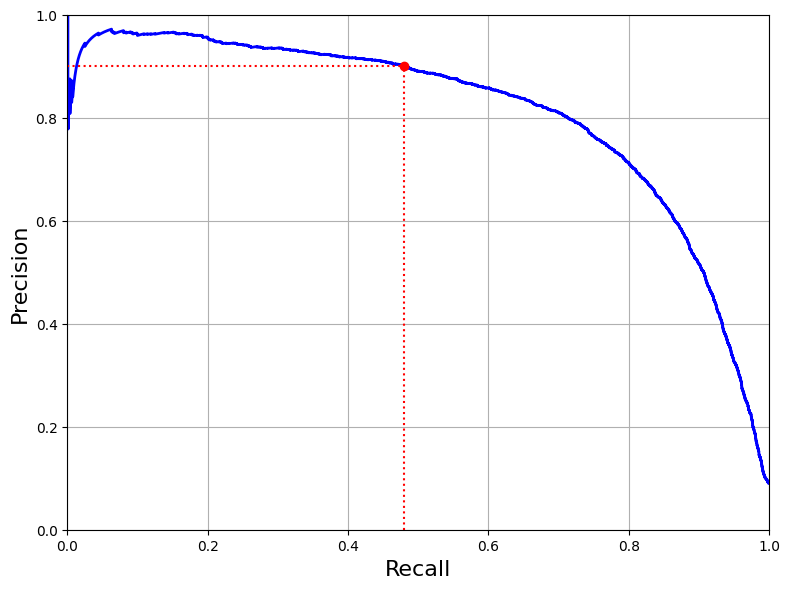

In [50]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

ROC Curve

In [51]:
from sklearn.metrics import roc_curve

In [52]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


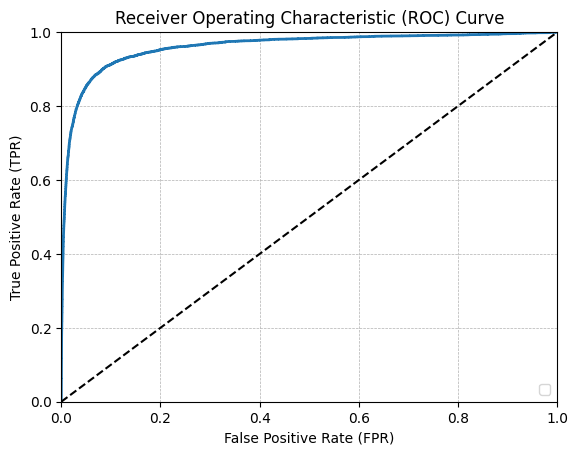

In [53]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth =2, label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc='lower right')

plot_roc_curve(fpr,tpr)
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [60]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

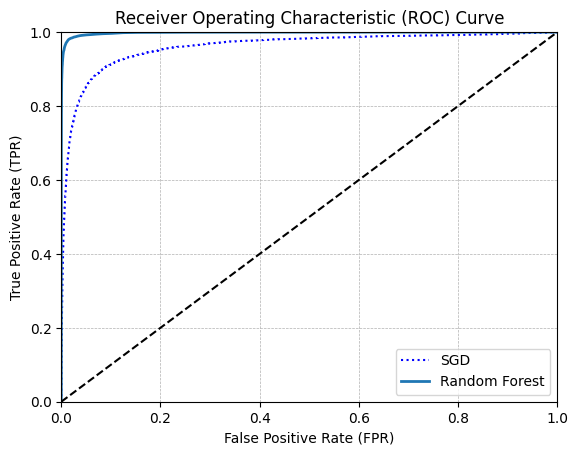

In [61]:
plt.plot(fpr,tpr,"b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [63]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [64]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)

In [67]:
np.mean(precisions)

0.8952714242689169

In [68]:
np.mean(recalls)

0.7610834409395562

In [69]:
np.mean(thresholds)

0.49999999999999994

In [70]:
#Multiclass Classification

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)


In [75]:
svc_clf.predict([some_digit])

array([5], dtype=uint8)